In [1]:
# !pip install uproot awkward mpl_scatter_density jupyter-dash zfit
import uproot, scipy, math, os, random, time, pickle, collections
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import awkward as ak
from tqdm import tqdm
import pandas as pd
from scipy import stats
from scipy.spatial.distance import cdist
from scipy.stats import iqr
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
f_unb_1910=  uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/Palignment_unbiased_KeMuon_newz.root')
f_unb_3495=  uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/Palignment_unbiased_z3495.root')
f_unb_2475=  uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/Palignment_unbiased_z2475.root')
f_unb_3990=  uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/Palignment_unbiased_z3990.root')
f_unb_302= uproot.open('/global/u2/a/agarabag/pscratch/alignment_samples/alignment_unbiased_101302_newz.root')


In [3]:
unb_302 = f_unb_302['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nOutliers',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [4]:
unb_1910 = f_unb_1910['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_nOutliers',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [5]:
unb_3495 = f_unb_3495['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_nOutliers',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [6]:
unb_2475 = f_unb_2475['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_nOutliers',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [7]:
unb_3990 = f_unb_3990['trackParam'].arrays(['fitParam_x',
                                     'fitParam_y',
                                     'fitParam_z',
                                     'fitParam_px',
                                     'fitParam_py',
                                     'fitParam_pz',
                                     'fitParam_chi2',
                                     'fitParam_charge',
                                     'fitParam_nOutliers',
                                     'fitParam_nHoles',
                                     'fitParam_nMeasurements',
                                     'fitParam_align_unbiased_sp',
                                     'fitParam_align_stationId_sp',
                                     'fitParam_align_layerId_sp',
                                     'fitParam_align_moduleId_sp',
                                     'fitParam_align_stereoId',
                                     'fitParam_align_local_residual_x_sp'], library='ak')

In [20]:
def cutting(data):
    p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
    cut = ak.where((p>0)&
                   (ak.min(ak.flatten(data['fitParam_align_stationId_sp']), axis=-1)==0))
                   # (ak.flatten(data['fitParam_charge'])==1))
                  #(ak.flatten(data['fitParam_chi2']) < 100)&
               # (ak.flatten(data['fitParam_charge']) == charge)&
               # (ak.min(ak.flatten(data['fitParam_align_stationId_sp']), axis=-1)==0)&
               # (ak.min(ak.flatten(data['fitParam_align_layerId_sp']), axis=-1)==0)&
               # (ak.flatten(data['fitParam_nMeasurements']) > 14))
    return cut

## f_unb_1910 : befind the IFT
## f_unb_2475 : in the middle of the emulsion detector
## f_unb_3990 : somwehre in the concerte (not sure how deep). this is same z value as one used in 101302
## f_unb_3495 : between first layer of emulsion (3000) and z=3990


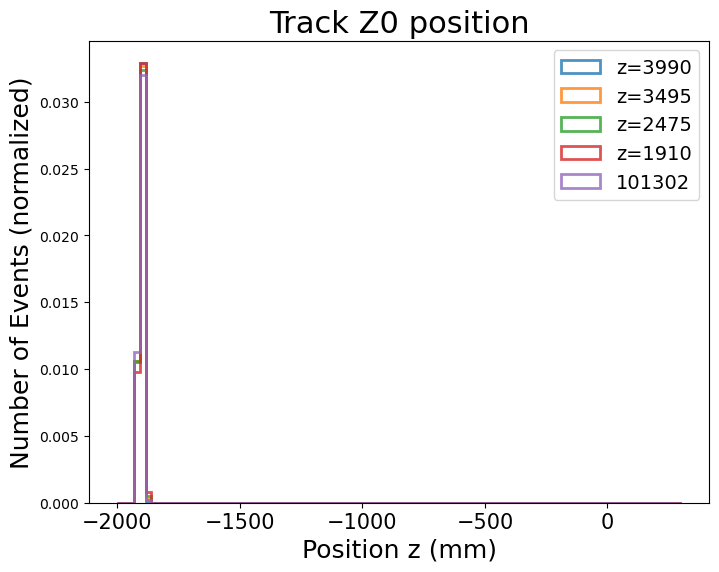

In [21]:
plt.figure(figsize=(8, 6))
bin=np.linspace(-2000, 300, 101)

plt.hist(ak.flatten(unb_3990['fitParam_z'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_z'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_z'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_z'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
plt.hist(ak.flatten(unb_302['fitParam_z'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('Position z (mm)', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Track Z0 position', fontsize=22)
plt.show()

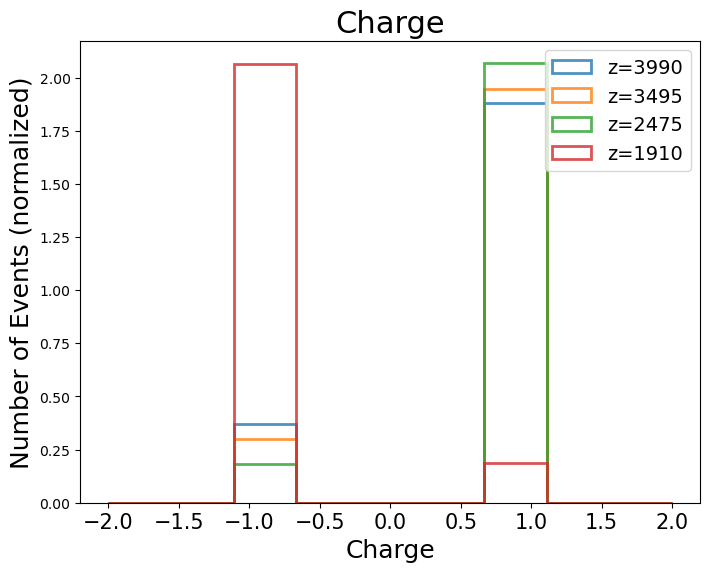

In [22]:
plt.figure(figsize=(8, 6))
bin=np.linspace(-2, 2, 10)

plt.hist(ak.flatten(unb_3990['fitParam_charge'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_charge'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_charge'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_charge'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
# plt.hist(ak.flatten(unb_302['fitParam_charge'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('Charge', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Charge', fontsize=22)
plt.show()

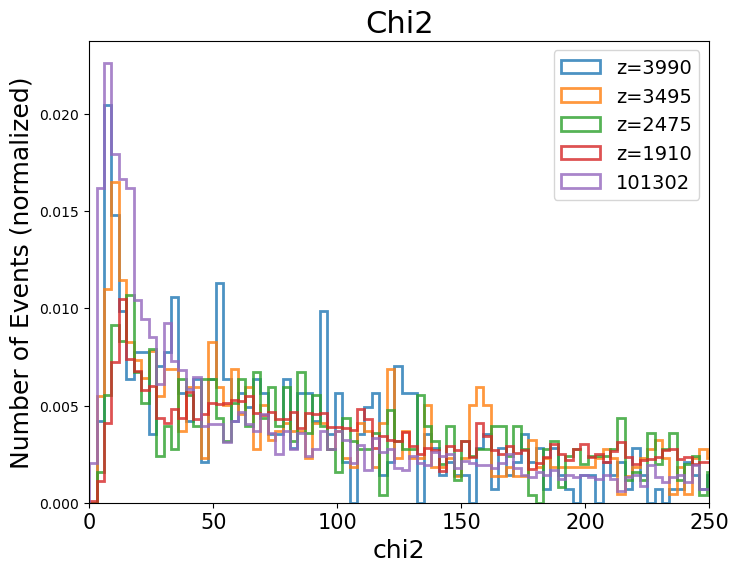

In [23]:
plt.figure(figsize=(8, 6))
bin=np.linspace(0, 300, 101)
plt.hist(ak.flatten(unb_3990['fitParam_chi2'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_chi2'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_chi2'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_chi2'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
plt.hist(ak.flatten(unb_302['fitParam_chi2'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('chi2', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Chi2', fontsize=22)
plt.xlim(0, 250)
#plt.xticks(np.linspace(5, 30, 6), fontsize=15)
plt.show()

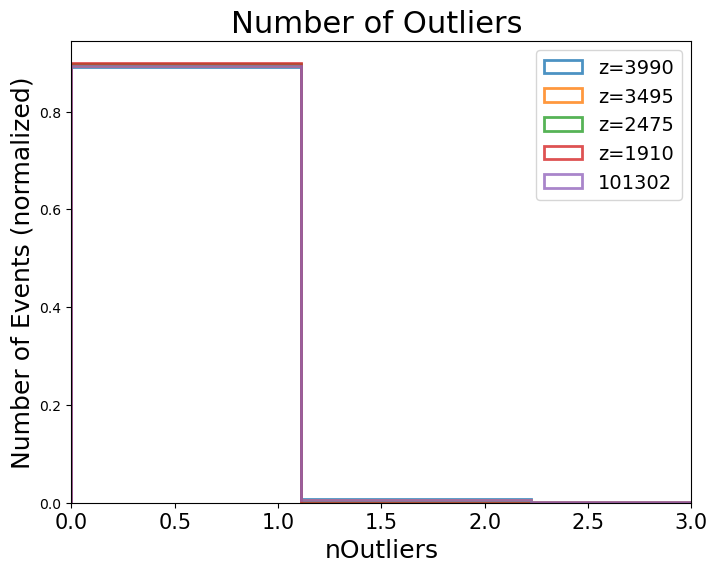

In [24]:
plt.figure(figsize=(8, 6))
bin=np.linspace(0, 10, 10)
plt.hist(ak.flatten(unb_3990['fitParam_nOutliers'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_nOutliers'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_nOutliers'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_nOutliers'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
plt.hist(ak.flatten(unb_302['fitParam_nOutliers'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('nOutliers', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.xlim(0, 3)
plt.title('Number of Outliers ', fontsize=22)
# plt.xticks(np.linspace(5, 30, 6), fontsize=15)
plt.show()

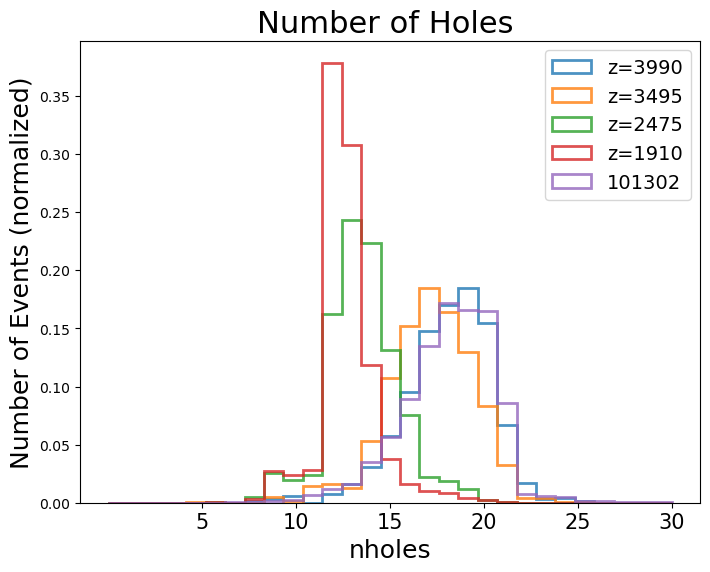

In [25]:
plt.figure(figsize=(8, 6))
bin=np.linspace(0, 30, 30)

plt.hist(ak.flatten(unb_3990['fitParam_nHoles'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_nHoles'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_nHoles'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_nHoles'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
plt.hist(ak.flatten(unb_302['fitParam_nHoles'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('nholes', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(fontsize=15)
plt.title('Number of Holes ', fontsize=22)
plt.xticks(np.linspace(5, 30, 6), fontsize=15)
plt.show()

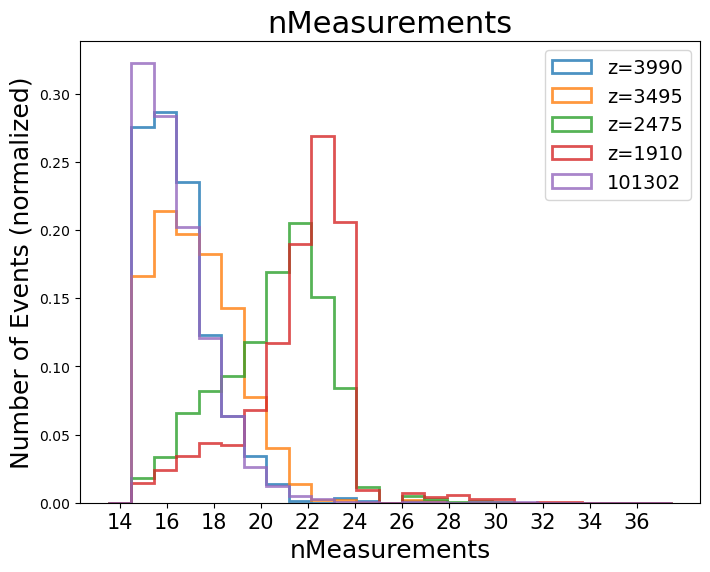

In [26]:
plt.figure(figsize=(8, 6))
bin=np.linspace(13.5, 37.5, 26)

plt.hist(ak.flatten(unb_3990['fitParam_nMeasurements'])[cutting(unb_3990)], bins=bin,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(ak.flatten(unb_3495['fitParam_nMeasurements'])[cutting(unb_3495)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3495")
plt.hist(ak.flatten(unb_2475['fitParam_nMeasurements'])[cutting(unb_2475)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=2475")
plt.hist(ak.flatten(unb_1910['fitParam_nMeasurements'])[cutting(unb_1910)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=1910")
plt.hist(ak.flatten(unb_302['fitParam_nMeasurements'])[cutting(unb_302)], bins=bin, histtype='step', linewidth=2, alpha=0.8,  density=True, label="101302")

plt.xlabel('nMeasurements', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.xticks(np.linspace(14, 36, 12), fontsize=15)
plt.title('nMeasurements', fontsize=22)
plt.show()

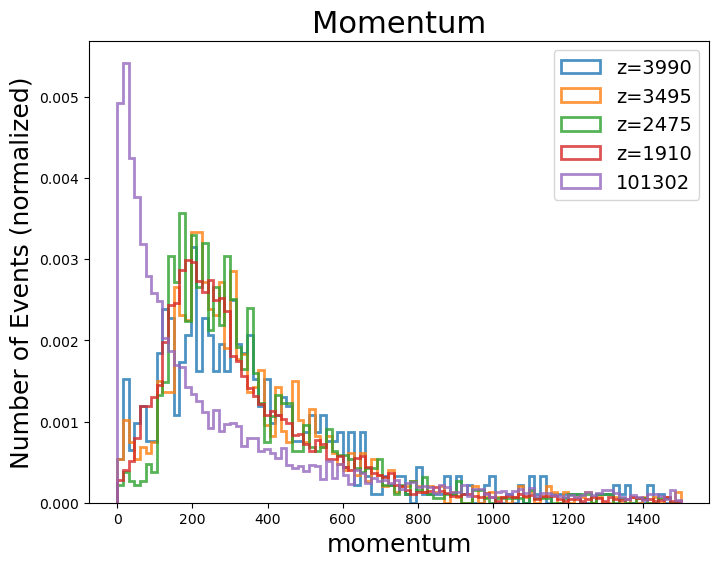

In [27]:
plt.figure(figsize=(8, 6))
def mom(px, py, pz):
    return np.sqrt(px**2+py**2+pz**2)
plt.hist(mom(ak.flatten(unb_3990['fitParam_px'])[cutting(unb_3990)], ak.flatten(unb_3990['fitParam_py'])[cutting(unb_3990)], ak.flatten(unb_3990['fitParam_pz'])[cutting(unb_3990)]), bins=np.linspace(0, 1500, 101) ,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(mom(ak.flatten(unb_3495['fitParam_px'])[cutting(unb_3495)], ak.flatten(unb_3495['fitParam_py'])[cutting(unb_3495)], ak.flatten(unb_3495['fitParam_pz'])[cutting(unb_3495)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label="z=3495")
plt.hist(mom(ak.flatten(unb_2475['fitParam_px'])[cutting(unb_2475)], ak.flatten(unb_2475['fitParam_py'])[cutting(unb_2475)], ak.flatten(unb_2475['fitParam_pz'])[cutting(unb_2475)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label="z=2475")
plt.hist(mom(ak.flatten(unb_1910['fitParam_px'])[cutting(unb_1910)], ak.flatten(unb_1910['fitParam_py'])[cutting(unb_1910)], ak.flatten(unb_1910['fitParam_pz'])[cutting(unb_1910)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label='z=1910')
plt.hist(mom(ak.flatten(unb_302['fitParam_px'])[cutting(unb_302)], ak.flatten(unb_302['fitParam_py'])[cutting(unb_302)], ak.flatten(unb_302['fitParam_pz'])[cutting(unb_302)]), histtype='step', linewidth=2, bins=np.linspace(0, 1500, 101), alpha=0.8, density=True, label='101302')

plt.xlabel('momentum', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
plt.title('Momentum', fontsize=22)
plt.show()

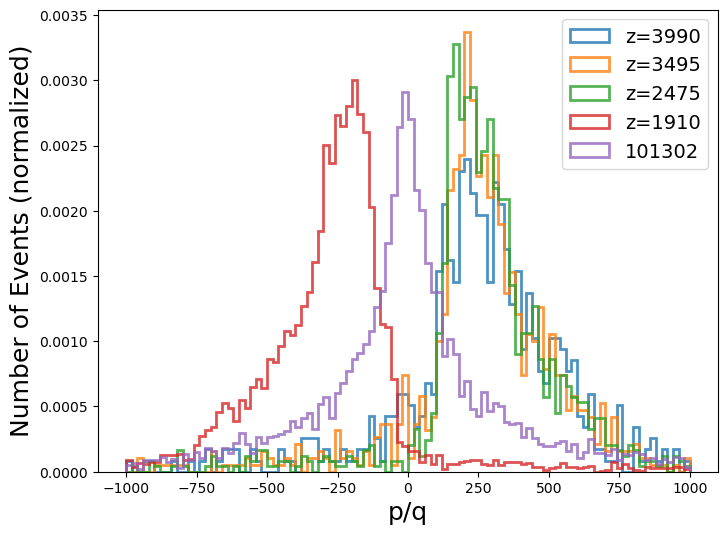

In [28]:
plt.figure(figsize=(8, 6))
def mom(px, py, pz):
    return np.sqrt(px**2+py**2+pz**2)
plt.hist(mom(ak.flatten(unb_3990['fitParam_px'])[cutting(unb_3990)], ak.flatten(unb_3990['fitParam_py'])[cutting(unb_3990)], ak.flatten(unb_3990['fitParam_pz'])[cutting(unb_3990)])/ak.flatten(unb_3990['fitParam_charge'])[cutting(unb_3990)], bins=np.linspace(-1000, 1000, 101) ,histtype='step', linewidth=2, alpha=0.8,  density=True, label="z=3990")
plt.hist(mom(ak.flatten(unb_3495['fitParam_px'])[cutting(unb_3495)], ak.flatten(unb_3495['fitParam_py'])[cutting(unb_3495)], ak.flatten(unb_3495['fitParam_pz'])[cutting(unb_3495)])/ak.flatten(unb_3495['fitParam_charge'])[cutting(unb_3495)], histtype='step', linewidth=2, bins=np.linspace(-1000, 1000, 101), alpha=0.8, density=True, label="z=3495")
plt.hist(mom(ak.flatten(unb_2475['fitParam_px'])[cutting(unb_2475)], ak.flatten(unb_2475['fitParam_py'])[cutting(unb_2475)], ak.flatten(unb_2475['fitParam_pz'])[cutting(unb_2475)])/ak.flatten(unb_2475['fitParam_charge'])[cutting(unb_2475)], histtype='step', linewidth=2, bins=np.linspace(-1000, 1000, 101), alpha=0.8, density=True, label="z=2475")
plt.hist(mom(ak.flatten(unb_1910['fitParam_px'])[cutting(unb_1910)], ak.flatten(unb_1910['fitParam_py'])[cutting(unb_1910)], ak.flatten(unb_1910['fitParam_pz'])[cutting(unb_1910)])/ak.flatten(unb_1910['fitParam_charge'])[cutting(unb_1910)], histtype='step', linewidth=2, bins=np.linspace(-1000, 1000, 101), alpha=0.8, density=True, label='z=1910')
plt.hist(mom(ak.flatten(unb_302['fitParam_px'])[cutting(unb_302)], ak.flatten(unb_302['fitParam_py'])[cutting(unb_302)], ak.flatten(unb_302['fitParam_pz'])[cutting(unb_302)])/ak.flatten(unb_302['fitParam_charge'])[cutting(unb_302)], histtype='step', linewidth=2, bins=np.linspace(-1000, 1000, 101), alpha=0.8, density=True, label='101302')

plt.xlabel('p/q', fontsize=18)
plt.ylabel('Number of Events (normalized)', fontsize=18)
plt.legend(fontsize=14)
# plt.title('Momentum', fontsize=22)
plt.show()

In [29]:
# plt.figure(figsize=(10, 10))
# plt.scatter(ak.flatten(unb_survey['fitParam_x'])[cutting(unb_survey)], ak.flatten(unb_survey['fitParam_y'])[cutting(unb_survey)], marker='.', s=5, label="unbiased Survey")
# plt.scatter(ak.flatten(b_survey['fitParam_x'])[cutting(b_survey)], ak.flatten(b_survey['fitParam_y'])[cutting(b_survey)], marker='.', s=5, label="biased Survey")
# #plt.scatter(ak.flatten(unb_st['fitParam_x']), ak.flatten(unb_st['fitParam_y']), marker='.', s=5, label='Unbiased')
# #plt.scatter(ak.flatten(b_st['fitParam_x']), ak.flatten(b_st['fitParam_y']), marker='.', s=5, label='Biased')

# plt.ylim(-150, 150)
# plt.xlabel('x (mm)', fontsize=16)
# plt.ylabel('y (mm)', fontsize=16)
# plt.legend(fontsize=14)
# plt.xlim(-150, 150)
# plt.ylim(-150, 150)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('x-y scatter plot', fontsize=20)
# plt.show()

In [74]:
# plt.figure(figsize=(10, 10))
# plt.scatter(ak.flatten(unb_st['fitParam_x'])[cutting(unb_st)], ak.flatten(unb_st['fitParam_y'])[cutting(unb_st)], marker='.', s=5, label='Unbiased')
# plt.scatter(ak.flatten(b_st['fitParam_x'])[cutting(b_st)], ak.flatten(b_st['fitParam_y'])[cutting(b_st)], marker='.', s=5, label='Biased')

# plt.ylim(-150, 150)
# plt.xlabel('x (mm)', fontsize=16)
# plt.ylabel('y (mm)', fontsize=16)
# plt.legend(fontsize=14)
# plt.xlim(-150, 150)
# plt.ylim(-150, 150)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.title('x-y scatter plot', fontsize=20)
# plt.show()

In [75]:
# # ty
# plt.figure(figsize=(25, 10))
# plt.subplot(1, 2, 1)
# bin = np.linspace(-0.05, 0.05, 101)
# ke_tx, unb_st_tx, b_st_tx = ak.flatten(ke['fitParam_px'])/ak.flatten(ke['fitParam_pz']), ak.flatten(unb_st['fitParam_px'])/ak.flatten(unb_st['fitParam_pz']), ak.flatten(b_st['fitParam_px'])/ak.flatten(b_st['fitParam_pz'])
# unb_survey_tx, b_survey_tx = ak.flatten(unb_survey['fitParam_px'])/ak.flatten(unb_survey['fitParam_pz']), ak.flatten(b_survey['fitParam_px'])/ak.flatten(b_survey['fitParam_pz'])
# # plt.hist(ke_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f"ke's unbiased tx µ: {round(np.mean(ke_tx), 3)}, σ: {round(np.std(ke_tx), 3)}")
# plt.hist(unb_st_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unb Perfect Geo tx µ: {round(np.mean(unb_st_tx), 3)}, σ: {round(np.std(unb_st_tx), 3)}')
# plt.hist(b_st_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased Perfect Geo tx µ: {round(np.mean(b_st_tx), 3)}, σ: {round(np.std(b_st_tx), 3)}')
# plt.hist(unb_survey_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unbiased Survey tx µ: {round(np.mean(unb_survey_tx), 3)}, σ: {round(np.std(unb_survey_tx), 3)}')
# plt.hist(b_survey_tx, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased Survey tx µ: {round(np.mean(b_survey_tx), 3)}, σ: {round(np.std(b_survey_tx), 3)}')

# plt.xlabel('tx', fontsize=18)
# plt.ylabel('Number of Events (normalized)', fontsize=18)
# plt.title('tx', fontsize=22)
# plt.xticks(fontsize=15)
# plt.legend(fontsize=15)

# # ty
# plt.subplot(1, 2, 2)
# ke_ty, unb_st_ty, b_st_ty = ak.flatten(ke['fitParam_py'])/ak.flatten(ke['fitParam_pz']), ak.flatten(unb_st['fitParam_py'])/ak.flatten(unb_st['fitParam_pz']), ak.flatten(b_st['fitParam_py'])/ak.flatten(b_st['fitParam_pz'])
# unb_survey_ty, b_survey_ty = ak.flatten(unb_survey['fitParam_py'])/ak.flatten(unb_survey['fitParam_pz']), ak.flatten(b_survey['fitParam_py'])/ak.flatten(b_survey['fitParam_pz'])
# # plt.hist(ke_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f"ke's unbiased ty µ: {round(np.mean(ke_ty), 3)}, σ: {round(np.std(ke_ty), 3)}")
# plt.hist(unb_st_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unb Perfect Geo ty µ: {round(np.mean(unb_st_ty), 3)}, σ: {round(np.std(unb_st_ty), 3)}')
# plt.hist(b_st_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased Perfect Geo ty µ: {round(np.mean(b_st_ty), 3)}, σ: {round(np.std(b_st_ty), 3)}')
# plt.hist(unb_survey_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'unbiased Survey ty µ: {round(np.mean(unb_survey_ty), 3)}, σ: {round(np.std(unb_survey_ty), 3)}')
# plt.hist(b_survey_ty, histtype='step', linewidth=2, bins=bin, alpha=0.6, density=True, label=f'biased Survey ty µ: {round(np.mean(b_survey_ty), 3)}, σ: {round(np.std(b_survey_ty), 3)}')

# plt.xlabel('ty', fontsize=18)
# plt.ylabel('Number of Events (normalized)', fontsize=18)
# plt.title('ty', fontsize=22)
# plt.xticks(fontsize=15)

# plt.legend(fontsize=15)

# plt.show()

In [30]:
def plot_cut(data, station, charge, unbiased=True):
    if charge==1 or charge==-1:
        p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
        cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
                       (ak.flatten(data['fitParam_nMeasurements']) > 14)&
                       (p>0)&
                       (ak.flatten(data['fitParam_charge']) == charge))
            #          #(ak.flatten(data['fitParam_pz']) >= p_min)&
            #          #(ak.flatten(data['fitParam_pz']) < p_max)&
            #          (ak.min(ak.flatten(data['fitParam_align_stationId_sp']), axis=-1)==0)&
            #          (ak.min(ak.flatten(data['fitParam_align_layerId_sp']), axis=-1)==0)&
    else:
        p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
        cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
                       (p>0)&
                       (ak.flatten(data['fitParam_nMeasurements']) > 14))
        
    res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
    sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
    bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])

    if unbiased==True:
        return res_x[ak.where((sta==station)&(bias==3))]
    elif unbiased==False:
        return res_x[ak.where((sta==station)&(bias==0))]
    else: 
        return res_x[ak.where(sta==station)]

In [31]:
# res_x = ak.flatten(ak.flatten(unb_survey['fitParam_align_local_residual_x_sp']))
# sta = ak.flatten(ak.flatten(unb_survey['fitParam_align_stationId_sp']))
# bias = ak.flatten(ak.flatten(unb_survey['fitParam_align_unbiased_sp']))
# print(res_x[ak.where((sta==0)&(bias==3))])
# print(ak.where(ak.flatten(ak.flatten(b_st['fitParam_align_stationId_sp']))==3))

In [32]:
def plot(charge):
    plt.figure(figsize=(24, 16))
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    sta=0

    plt.subplot(2, 2, 1)
    plt.hist(plot_cut(unb_3990, sta, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3990 µ: {round(np.median(plot_cut(unb_3990, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3990, sta, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_3495, sta, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3495 µ: {round(np.median(plot_cut(unb_3495, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3495, sta, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_2475, sta, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_2475 µ: {round(np.median(plot_cut(unb_2475, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_2475, sta, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_1910, sta, charge, unbiased=True),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'b_perfect_geo µ: {round(np.median(plot_cut(unb_1910, sta, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_1910, sta, charge, unbiased=True)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f'Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta}', fontsize=36)

    plt.subplot(2, 2, 2)
    plt.hist(plot_cut(unb_3990, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3990 µ: {round(np.median(plot_cut(unb_3990, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3990, sta+1, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+1, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_3495, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3495 µ: {round(np.median(plot_cut(unb_3495, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3495, sta+1, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_2475, sta+1, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_2475 µ: {round(np.median(plot_cut(unb_2475, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_2475, sta+1, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_1910, sta+1, charge, unbiased=True),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'unb_1910 µ: {round(np.median(plot_cut(unb_1910, sta+1, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_1910, sta+1, charge, unbiased=True)), 2)}')
    plt.xlabel(' Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+1}', fontsize=36)

    plt.subplot(2, 2, 3)
    plt.hist(plot_cut(unb_3990, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3990 µ: {round(np.median(plot_cut(unb_3990, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3990, sta+2, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+2, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_3495, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3495 µ: {round(np.median(plot_cut(unb_3495, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3495, sta+2, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_2475, sta+2, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_2475 µ: {round(np.median(plot_cut(unb_2475, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_2475, sta+2, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_1910, sta+2, charge, unbiased=True),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'unb_1910 µ: {round(np.median(plot_cut(unb_1910, sta+2, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_1910, sta+2, charge, unbiased=True)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+2}', fontsize=36)

    plt.subplot(2, 2, 4)
    plt.hist(plot_cut(unb_3990, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3990 µ: {round(np.median(plot_cut(unb_3990, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3990, sta+3, charge, unbiased=True)), 2)}')
    # plt.hist(plot_cut(ke, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Ke µ: {round(np.median(plot_cut(ke, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(ke, sta+3, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_3495, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3495 µ: {round(np.median(plot_cut(unb_3495, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_3495, sta+3, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_2475, sta+3, charge, unbiased=True), histtype='step', linewidth=2.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_2475 µ: {round(np.median(plot_cut(unb_2475, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_2475, sta+3, charge, unbiased=True)), 2)}')
    plt.hist(plot_cut(unb_1910, sta+3, charge, unbiased=True),histtype='step', linewidth=2.5, density=True, bins=np.linspace(-0.2, 0.2, 121), alpha=0.8, label=f'unb_1910 µ: {round(np.median(plot_cut(unb_1910, sta+3, charge, unbiased=True)), 2)}, IQR50: {round(iqr(plot_cut(unb_1910, sta+3, charge, unbiased=True)), 2)}')
    plt.xlabel('Residual x (mm)', fontsize=30)
    plt.ylabel('Number of Events', fontsize=30)
    plt.legend(fontsize=12, title=f' Charge={charge}', title_fontsize=25)
    plt.xticks(fontsize=15)
    plt.xlim(-0.2, 0.2)
    plt.title(f'station={sta+3}', fontsize=36)

    plt.show()

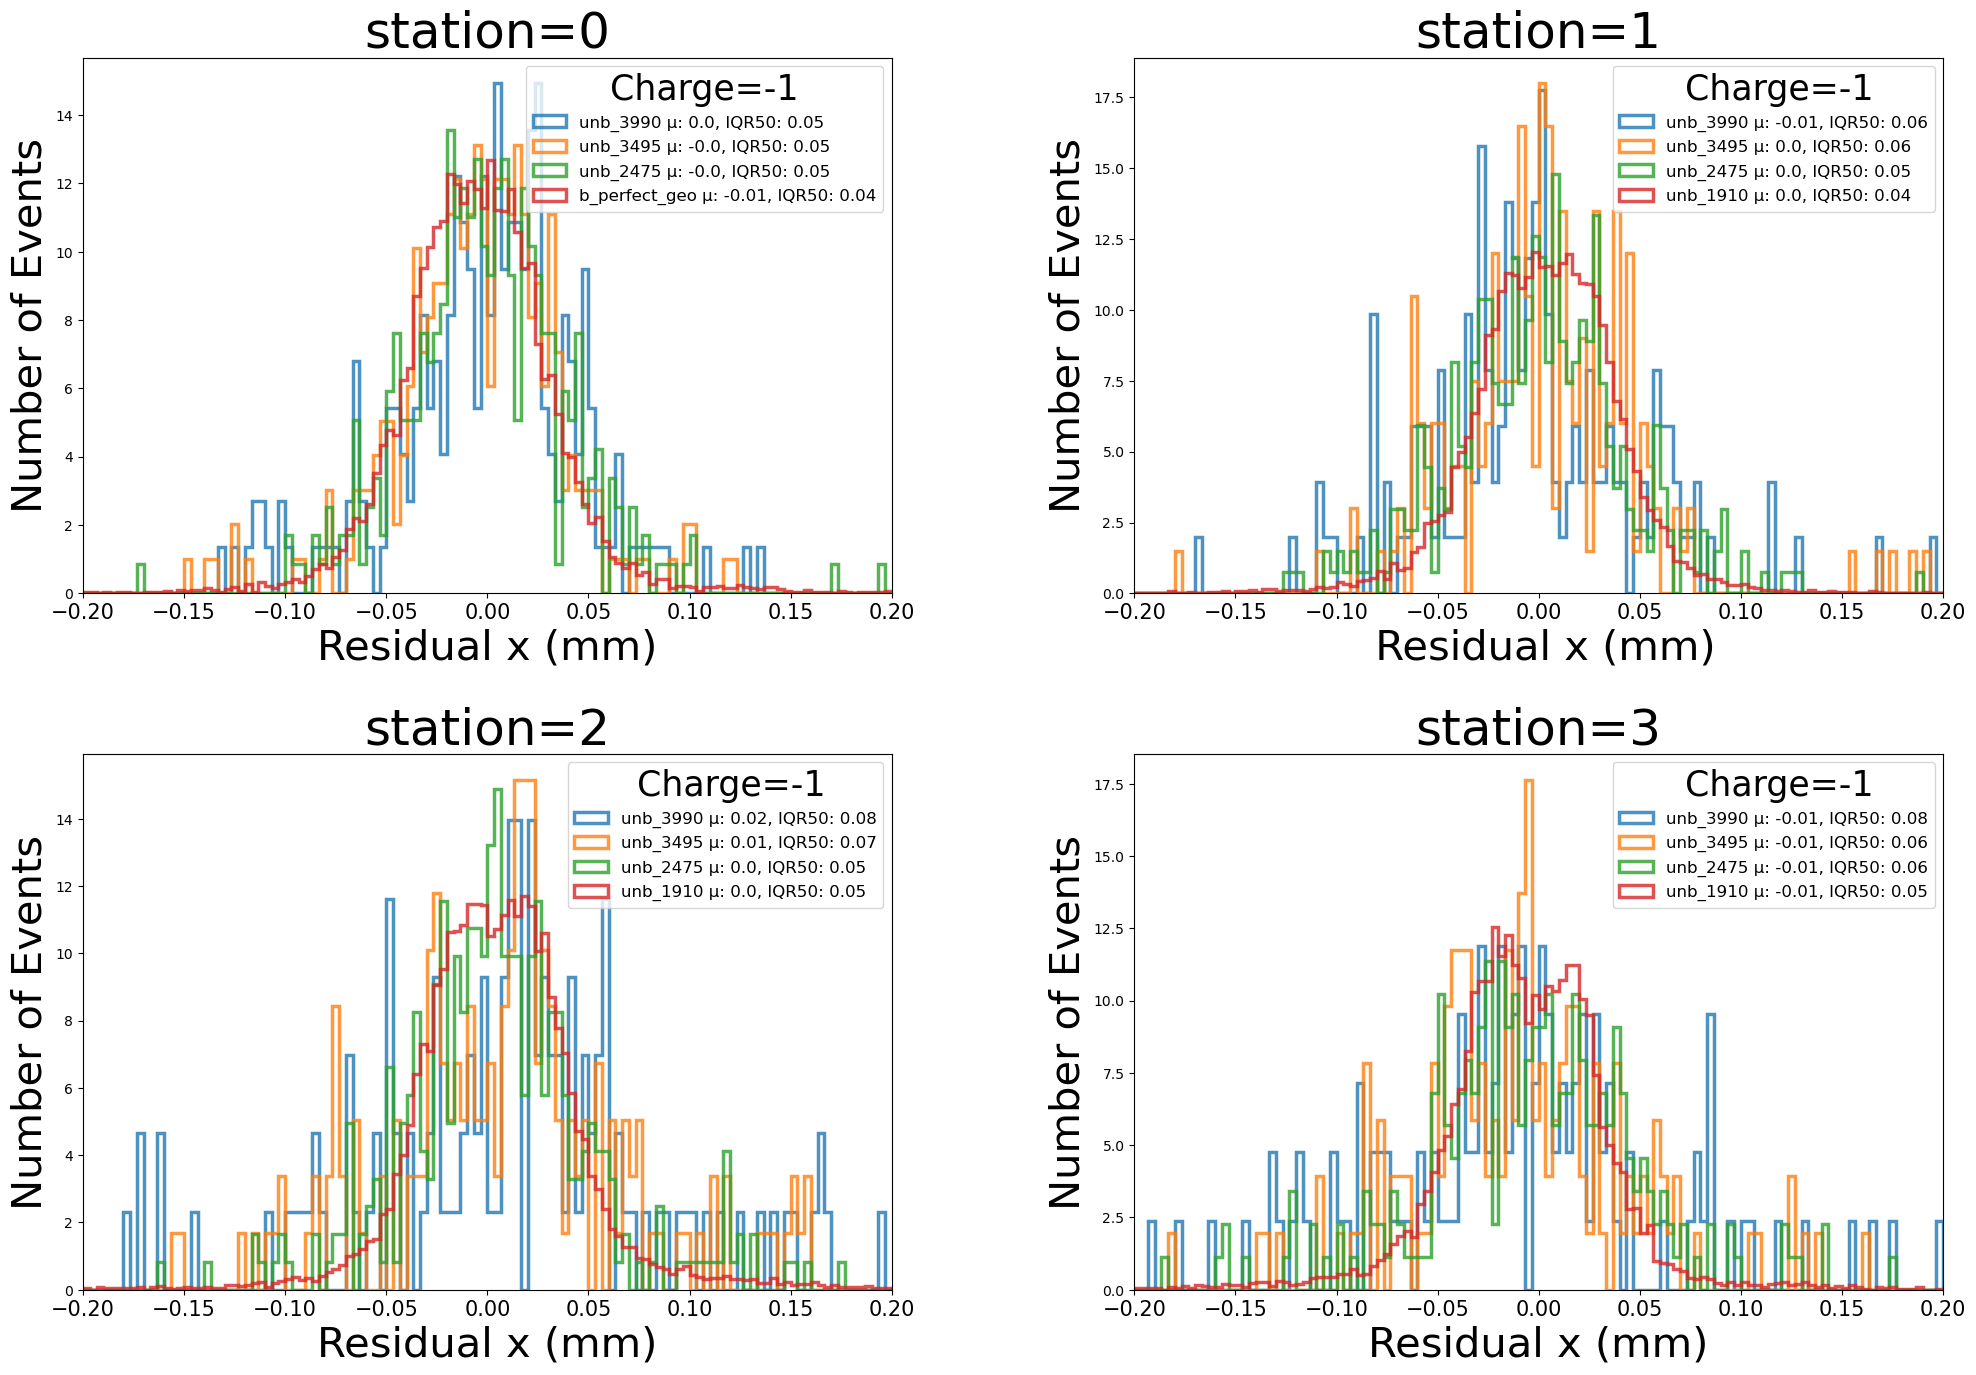

In [35]:
plot(-1)

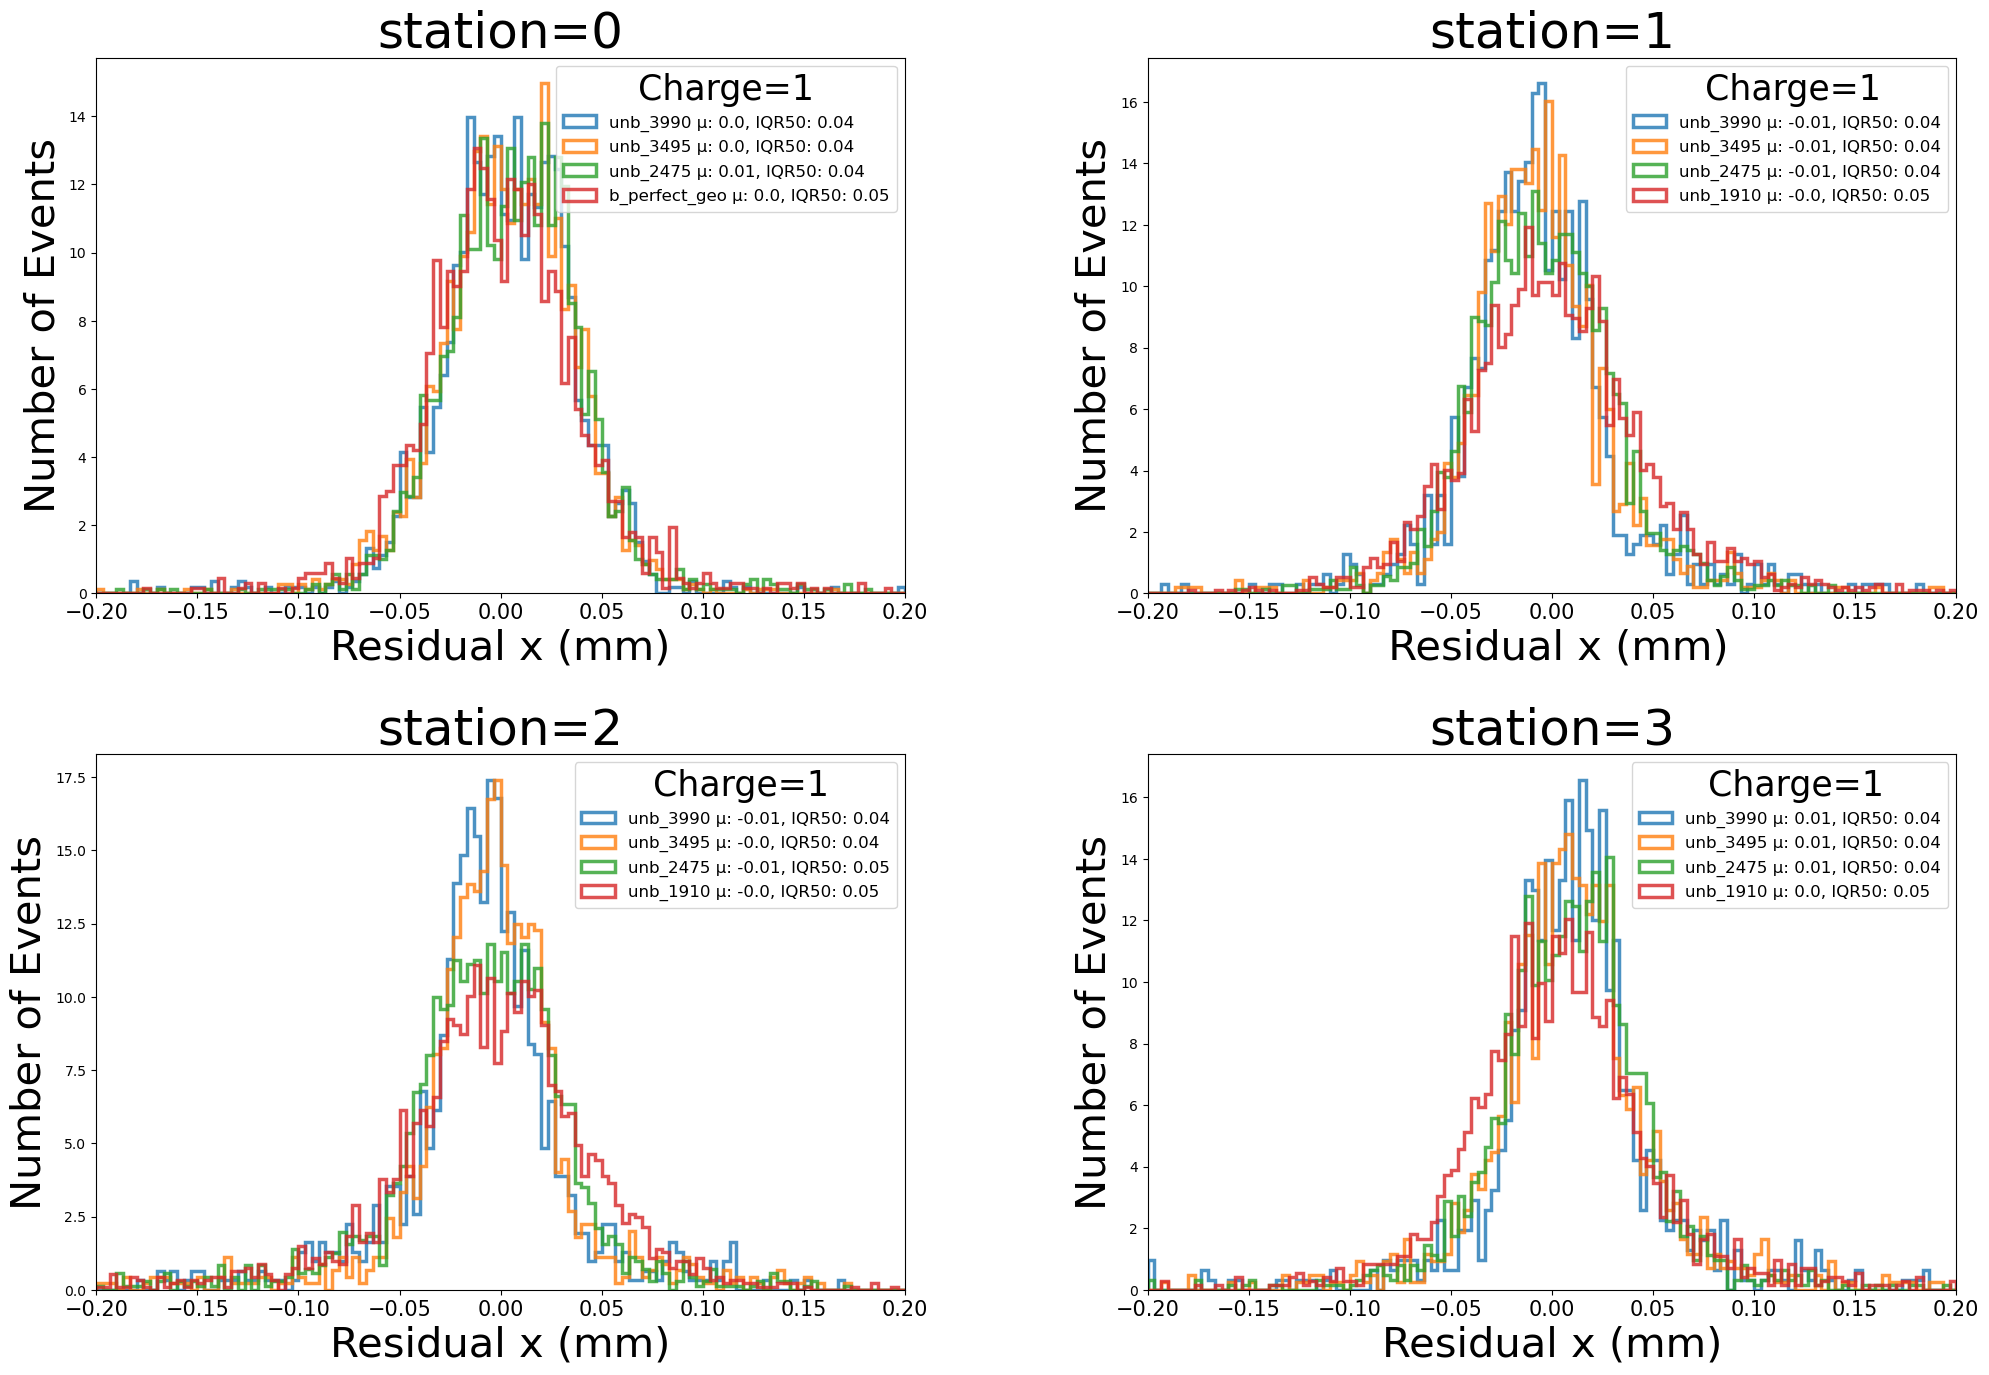

In [34]:
plot(1)

In [38]:
def res(data, station, layer, unbiased=True):    
    p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
    cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
                   (p>0)&
                   (ak.flatten(data['fitParam_nMeasurements']) > 14))
    
    res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
    sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
    lay = ak.flatten(ak.flatten(data['fitParam_align_layerId_sp'])[cut])
    # mod = ak.flatten(ak.flatten(data['fitParam_align_moduleId_sp'])[cut])
    # ste = ak.flatten(ak.flatten(data['fitParam_align_stereoId'])[cut])
    bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])


    if unbiased==True:
        return res_x[ak.where((sta==station)&(bias==3)&(lay==layer))]
    elif unbiased==False:
        return res_x[ak.where((sta==station)&(bias==0)&(lay==layer))]

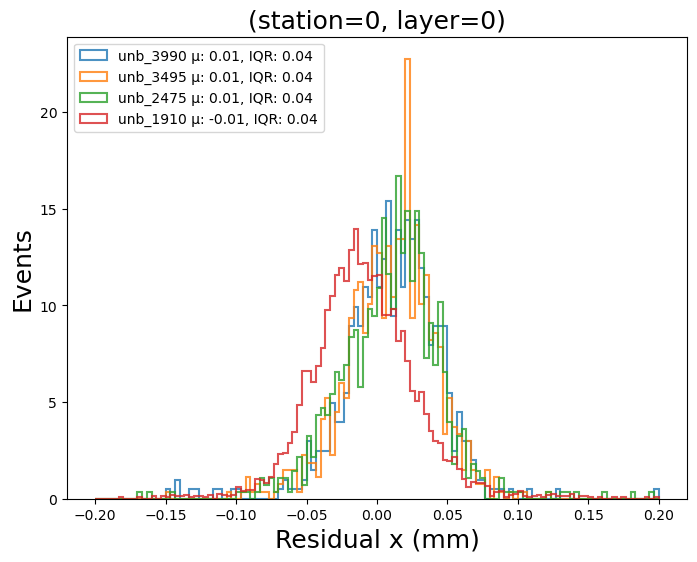

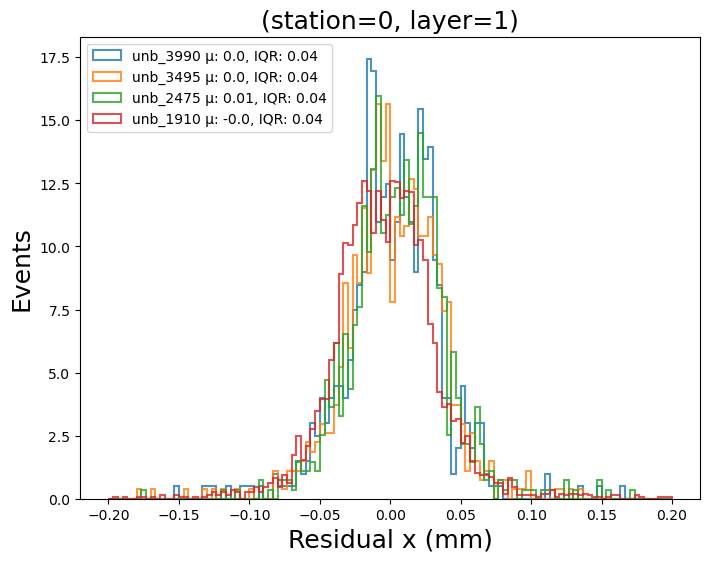

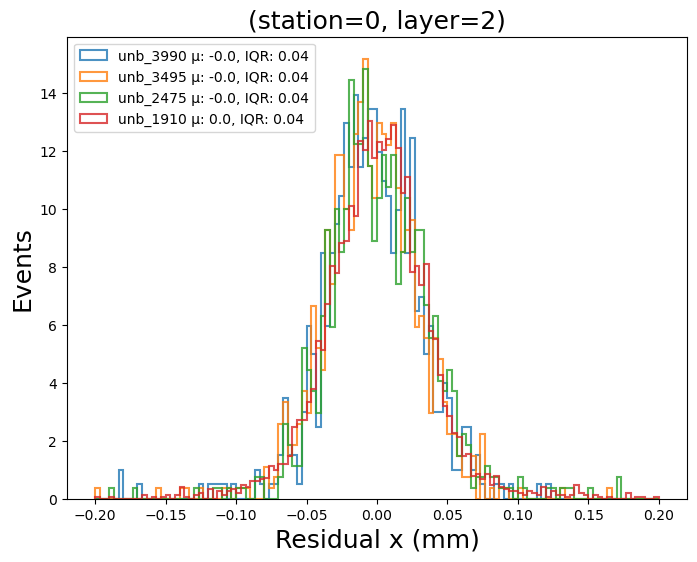

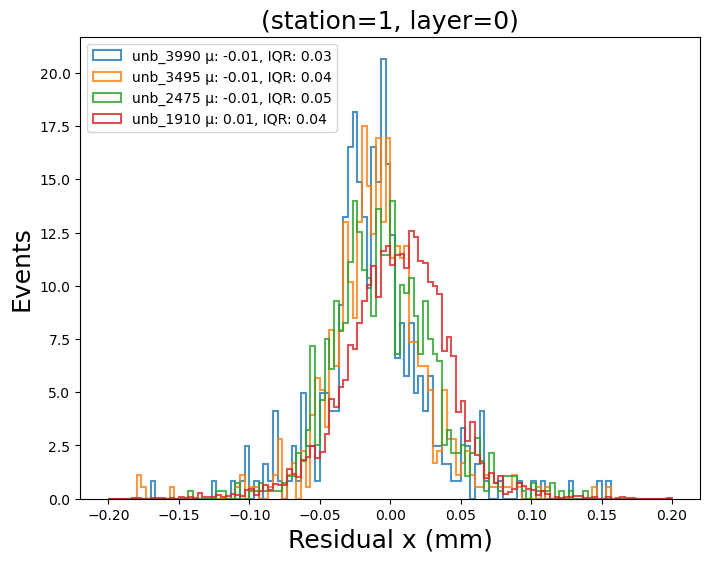

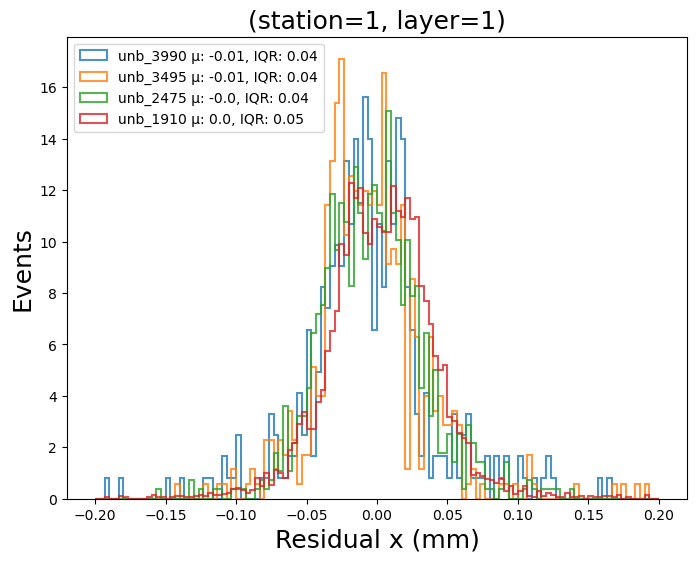

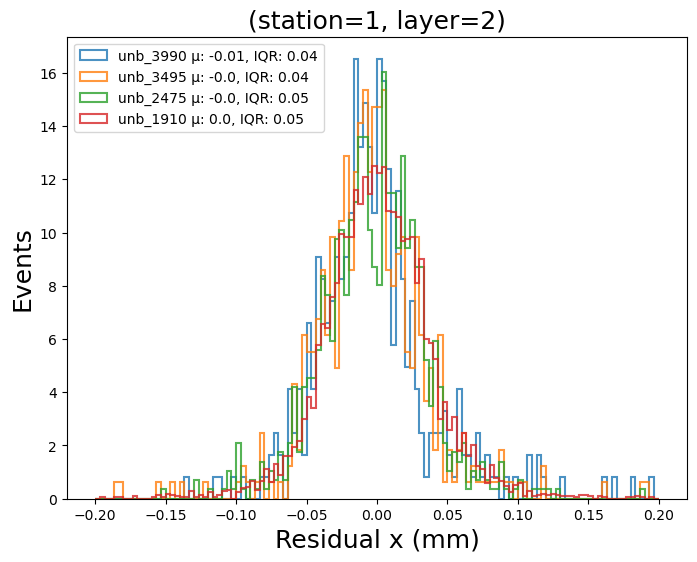

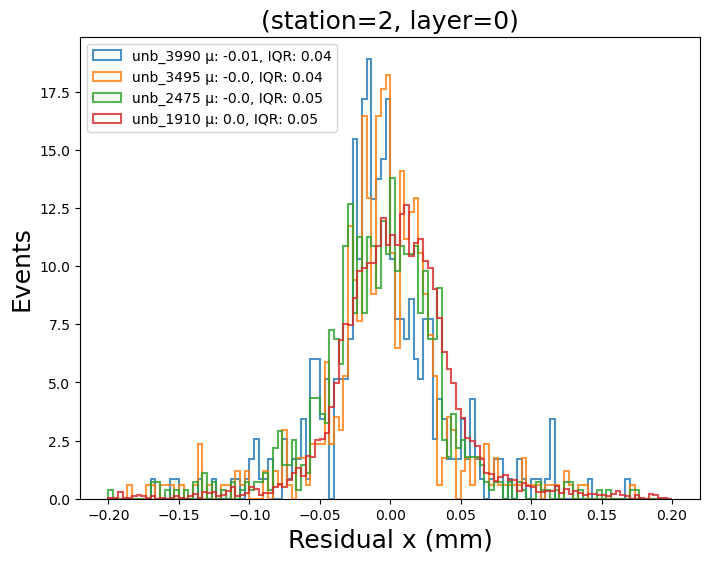

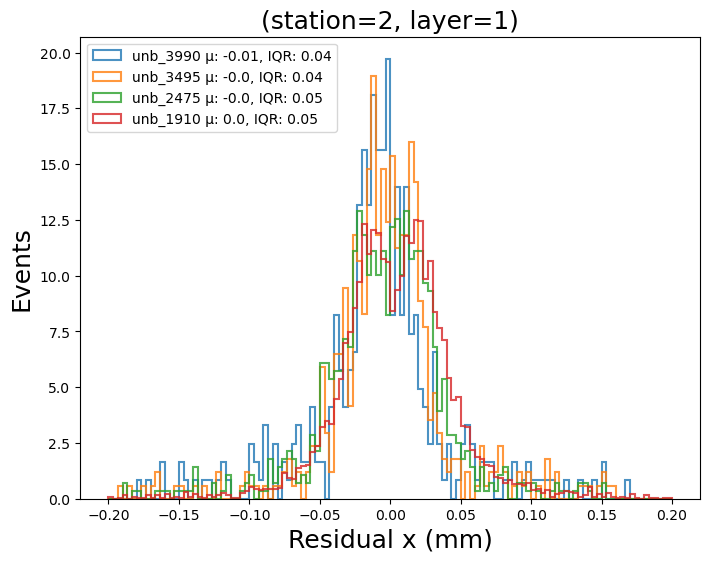

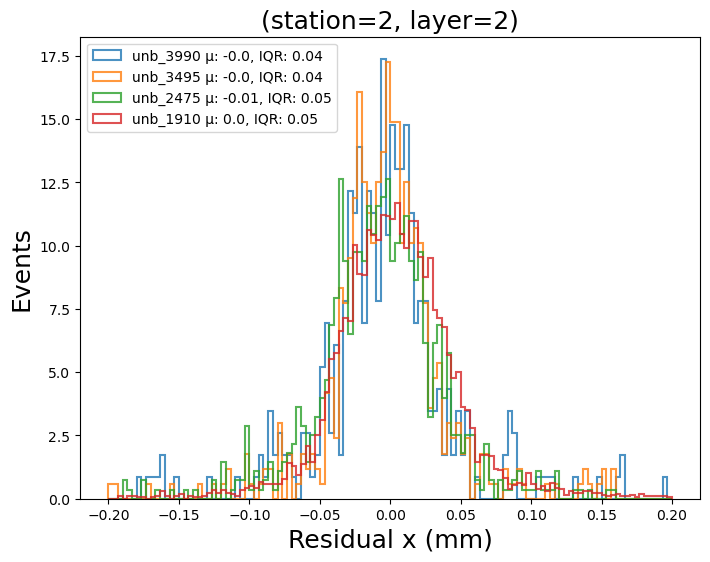

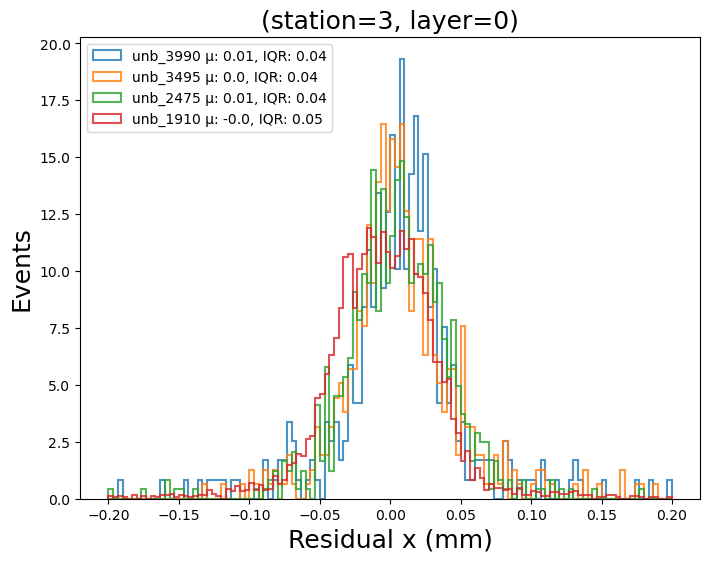

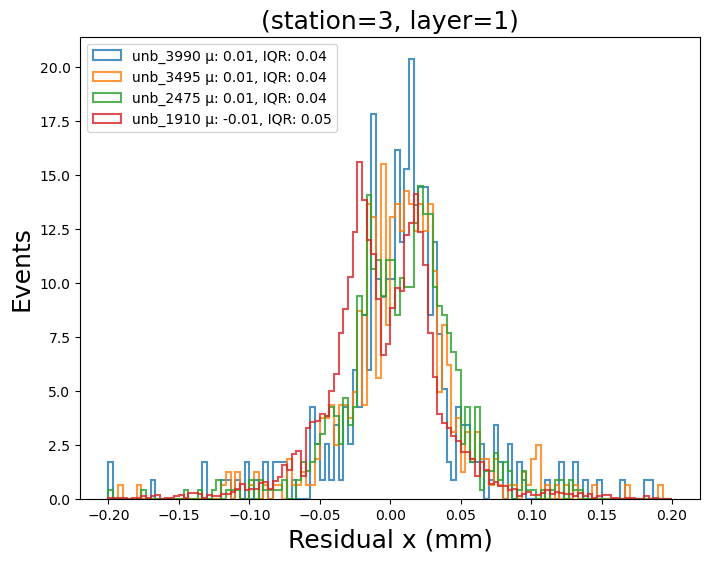

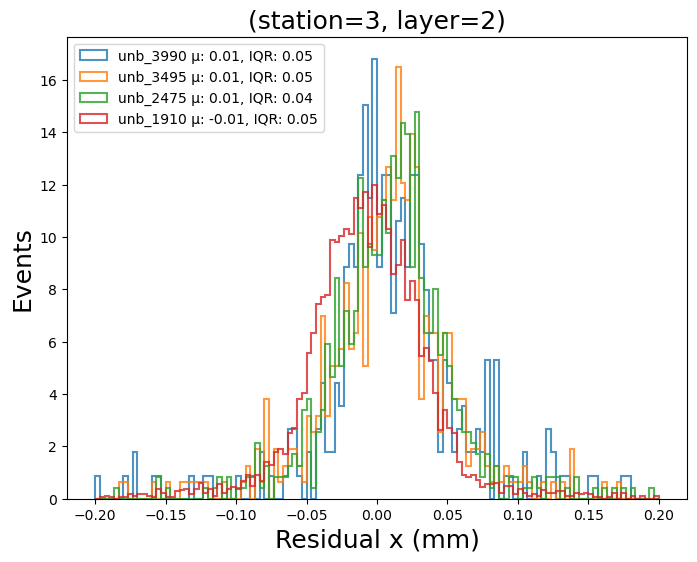

In [39]:
for i in range(4):
    for j in range(3):
        plt.figure(figsize=(8, 6),  dpi=100)
        plt.hist(res(unb_3990, i, j, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'unb_3990 µ: {round(np.median(res(unb_3990, i, j, unbiased=True)), 2)}, IQR: {round(iqr(res(unb_3990, i, j, unbiased=True)), 2)}')
        plt.hist(res(unb_3495, i, j, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'unb_3495 µ: {round(np.median(res(unb_3495, i, j, unbiased=True)), 2)}, IQR: {round(iqr(res(unb_3495, i, j, unbiased=True)), 2)}')
        plt.hist(res(unb_2475, i, j, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'unb_2475 µ: {round(np.median(res(unb_2475, i, j, unbiased=True)), 2)}, IQR: {round(iqr(res(unb_2475, i, j, unbiased=True)), 2)}')
        plt.hist(res(unb_1910, i, j, unbiased=True), histtype='step',linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'unb_1910 µ: {round(np.median(res(unb_1910, i, j, unbiased=True)), 2)}, IQR: {round(iqr(res(unb_1910, i, j, unbiased=True)), 2)}')
        plt.xlabel('Residual x (mm)', fontsize=18)
        plt.ylabel('Events', fontsize=18)
        #plt.xlim(-0.2, 0.2)
        plt.legend(fontsize=10, loc='upper left')
        plt.title(f'(station={i}, layer={j})', fontsize=18)
        # plt.savefig('SIC_vs_TPR.pdf', dpi=1200, format='pdf', bbox_inches='tight')
#         plt.show()

In [99]:
# def cut_vars(data, station, layer, unbiased=True):    
#     p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
#     cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
#                    (p>100)&
#                    (ak.flatten(data['fitParam_nMeasurements']) > 14))
    
#     res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
#     sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
#     lay = ak.flatten(ak.flatten(data['fitParam_align_layerId_sp'])[cut])
#     # mod = ak.flatten(ak.flatten(data['fitParam_align_moduleId_sp'])[cut])
#     # ste = ak.flatten(ak.flatten(data['fitParam_align_stereoId'])[cut])
#     bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])
#     nMeas = ak.flatten(data['fitParam_nMeasurements'])[cut]
#     nHoles = ak.flatten(data['fitParam_nHoles'])[cut]

#     print(len(data['fitParam_align_layerId_sp']), len(data['fitParam_nMeasurements']))
#     if unbiased==True:
#         return res_x[ak.where((sta==station)&(bias==3)&(lay==layer))], nMeas[ak.where((sta==station)&(lay==layer))], nHoles[ak.where((sta==station)&(lay==layer))]
#     elif unbiased==False:
#         return res_x[ak.where((sta==station)&(bias==0)&(lay==layer))], nMeas[ak.where((sta==station)&(lay==layer))], nHoles[ak.where((sta==station)&(lay==layer))]

In [100]:
# plt.figure(figsize=(12, 9))

# # x=np.arange(1, 4)

# # # plt.scatter(x, fluka_med, marker = ".")
# # plt.errorbar(x, fluka_med, yerr=fluka_iqr, fmt="o", ms=8, alpha=0.8, label="Fluka")
# # # plt.scatter(x, col_med, marker = ".")
# # plt.errorbar(x+0.05, col_med, yerr=col_iqr, fmt=">", ms=8, alpha=0.6, color="black", label="Data")
# # plt.errorbar(x-0.05, acol_med, yerr=acol_iqr, fmt="<", ms=8, alpha=0.8, label="Aligned Data")


# # plt.fill_between(x, np.array([fluka_iqr[x][0] for x in idx_list]), np.array([fluka_iqr[x][1] for x in idx_list]), color="orange", alpha=0.3)
# plt.scatter(unb_survey['fitParam_align_layerId_sp'], unb_survey['fitParam_nMeasurements'])
# # plt.yscale('log')
# plt.ylim(-5, 5)
# plt.xlabel('Layer Number', fontsize=18)
# plt.ylabel('Median Residual x', fontsize=18)
# plt.legend(fontsize=16, loc='upper right')

# plt.show()

In [101]:
# n_holes_per_layer= []
# n_meas_per_layer= []

# for i in range(4):
#     for j in range(3):
#         res, Meas, Hol = cut_vars(unb_survey, i, j, unbiased=True)
#         print(res)

In [102]:
# def cut_steo(data, station, layer, module, sterio, unbiased=True):
    
#     p = np.sqrt(ak.flatten(data['fitParam_px'])**2 + ak.flatten(data['fitParam_py'])**2 + ak.flatten(data['fitParam_pz'])**2)
#     cut = ak.where((ak.flatten(data['fitParam_chi2']) < 100)&
#                    (p>100)&
#                    (ak.flatten(data['fitParam_nMeasurements']) > 14))
    
# #     track_cutf = ak.where(ak.num(data['fitParam_pz'])==1)
# #     data1 = data[track_cutf]
# #     cut = ak.where((ak.flatten(data1['fitParam_chi2'])<500) & \
# #                 (ak.flatten(data1['fitParam_pz'])>300) & \
# #                 (ak.min(ak.flatten(data1['fitParam_align_stationId_sp']), axis=-1)==0)& \
# #                 (ak.flatten(data1['fitParam_nMeasurements'])>15))
    
                
    
#     res_x = ak.flatten(ak.flatten(data['fitParam_align_local_residual_x_sp'])[cut])
#     sta = ak.flatten(ak.flatten(data['fitParam_align_stationId_sp'])[cut])
#     lay = ak.flatten(ak.flatten(data['fitParam_align_layerId_sp'])[cut])
#     bias = ak.flatten(ak.flatten(data['fitParam_align_unbiased_sp'])[cut])
#     mod = ak.flatten(ak.flatten(data['fitParam_align_moduleId_sp'])[cut])
#     ster = ak.flatten(ak.flatten(data['fitParam_align_stereoId'])[cut])

#     if unbiased==True:
#         return res_x[ak.where((mod==module)&(ster==sterio)&(sta==station)&(bias==3)&(lay==layer))]
#     elif unbiased==False:
#         return res_x[ak.where((mod==module)&(ster==sterio)&(sta==station)&(bias==0)&(lay==layer))]

In [103]:
# def steo_plotter(i, j, k, l):
#     plt.figure(figsize=(8, 6))
#     # if i == 0:
#     #     bin = np.linspace(-1.2, 1.2, 121)
#     #     plt.xlim(-1, 1)
#     # else:
#     #     bin = np.linspace(-0.2, 0.2, 121)
#     #     plt.xlim(-0.2, 0.2)

    
#     # col_med.append(np.median(cut_steo(collision, i, j, l)))
#     # col_iqr.append(iqr(cut_steo(collision, i, j, l)))
#     # plt.figure(figsize=(8, 6), dpi=100)
#     # plt.hist(cut_steo(fluka, i, j, l), histtype='step', linewidth=1.5, bins=bin,  density=True,  alpha=0.8, label=f'Data | µ: {round(np.median(cut_steo(fluka, i, j, l)), 2)}, IQR: {round(iqr(cut_steo(fluka, i, j, l)), 2)}')
#     #plt.hist(cut_steo(collision, i, j, l), histtype='step', linewidth=1.5, bins=bin,  density=True,  alpha=0.8, label=f'Data | µ: {round(np.median(cut_steo(collision, i, j, l)), 2)}, IQR: {round(iqr(cut_steo(collision, i, j, l)), 2)}')
#     #plt.hist(cut_steo(ali_collision, i, j, l), histtype='step', linewidth=1.5, bins=bin,  density=True,  alpha=0.8, label=f'Aligned Data | µ: {round(np.median(cut_steo(ali_collision, i, j, l)), 2)}, IQR: {round(iqr(cut_steo(ali_collision, i, j, l)), 2)}')
    
    
#     plt.hist(cut_steo(unb_st, i, j, k, l, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True, alpha=0.8, label=f'Perfct Geo Unb µ: {round(np.median(cut_steo(unb_st, i, j, k, l, unbiased=True)), 2)}, IQR: {round(iqr(cut_steo(unb_st, i, j, k, l, unbiased=True)), 2)}')
#     plt.hist(cut_steo(unb_survey, i, j, k, l, unbiased=True), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'Surv Unb µ: {round(np.median(cut_steo(unb_survey, i, j, k, l, unbiased=True)), 2)}, IQR: {round(iqr(cut_steo(unb_survey, i, j, k, l, unbiased=True)), 2)}')
#     plt.hist(cut_steo(b_survey, i, j, k, l, unbiased=False), histtype='step', linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'Surv B µ: {round(np.median(cut_steo(b_survey, i, j,k, l, unbiased=False)), 2)}, IQR: {round(iqr(cut_steo(b_survey, i, j, k, l, unbiased=False)), 2)}')
#     plt.hist(cut_steo(b_st, i, j, k, l, unbiased=False), histtype='step',linewidth=1.5, bins=np.linspace(-0.2, 0.2, 121), density=True,  alpha=0.8, label=f'Perfct Geo B µ: {round(np.median(cut_steo(b_st, i, j, k, l, unbiased=False)), 2)}, IQR: {round(iqr(cut_steo(b_st, i, j, k, l, unbiased=False)), 2)}')
        
        
#     plt.xlabel('Residual x (mm)', fontsize=18)
#     # plt.ylabel('Events / 0.06 mm', fontsize=18)
#     # plt.xlim([-0.2, 0.2])
#     plt.legend(fontsize=12, loc='upper left')
#     plt.title(f'(station={i}, layer={j}, module={k}, stereo={l})', fontsize=16)
#     plt.show()

# for i in range(1,2):
#     for j in [1]:
#         for k in range(8):
#             for l in range(2):
#               steo_plotter(i, j, k, l)
# # plot(0, 0, 0)
       